In [1]:
# Panutad Sirikul
# 650510714

6 SEP 2024

### Dataset: Twitter Sentiment Dataset (https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset?resource=download)

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('Twitter_Data.csv')
data = data.dropna()
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


### Text Preprocessing

In [ ]:
text = data['clean_text'][0]

In [ ]:
# เวลาเราทำอะไรกับ Text เราต้อง Preprocessing ด้วย
text = text.lower()

In [ ]:
tokens = nltk.tokenize.word_tokenize(text)
print(tokens)

['when', 'modi', 'promised', '“', 'minimum', 'government', 'maximum', 'governance', '”', 'expected', 'him', 'begin', 'the', 'difficult', 'job', 'reforming', 'the', 'state', 'why', 'does', 'take', 'years', 'get', 'justice', 'state', 'should', 'and', 'not', 'business', 'and', 'should', 'exit', 'psus', 'and', 'temples']


In [ ]:
# สังเกตว่ามีตัวอักษรอย่าง สัญลักษณ์ มันไม่ค่อยเกี่ยวกับ Sentiment ของประโยค ดังนั้นเราจะลบ Punctuation ต่าง ๆ เหล่านี้
punctuationSet = [c for c in string.punctuation]+['’','“','”']
tokenRemovedNuisance = []
for token in tokens: # เอาแต่ละ token ที่ตัดมา ดูว่ามันอยู่ใน punctuationSet ที่กำหนดไว้หรือเปล่า
  if token not in punctuationSet: # ถ้าไม่อยู่ใน punctuationSet จะนำมา append
    tokenRemovedNuisance.append(token)

In [ ]:
print(tokenRemovedNuisance)

['when', 'modi', 'promised', 'minimum', 'government', 'maximum', 'governance', 'expected', 'him', 'begin', 'the', 'difficult', 'job', 'reforming', 'the', 'state', 'why', 'does', 'take', 'years', 'get', 'justice', 'state', 'should', 'and', 'not', 'business', 'and', 'should', 'exit', 'psus', 'and', 'temples']


In [ ]:
# หยิบเอาแต่ละ Token ใน List ก่อนหน้านี้มาใส่ เพื่อให้คำอยู่ในรูป Base form
pst = nltk.stem.PorterStemmer()
StemmingWord = []
for word in tokenRemovedNuisance:
    stw = pst.stem(word)
    StemmingWord.append(stw)

In [ ]:
print(StemmingWord)

['when', 'modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'him', 'begin', 'the', 'difficult', 'job', 'reform', 'the', 'state', 'whi', 'doe', 'take', 'year', 'get', 'justic', 'state', 'should', 'and', 'not', 'busi', 'and', 'should', 'exit', 'psu', 'and', 'templ']


สามารถเอาการทำ Text Preprocessing มารวบเป็นฟังก์ชันเดียวได้ดังนี้

In [ ]:
def my_preprocessing(text):
    text = text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text)
    punctuationSet = [c for c in string.punctuation]+['’','“','”']
    tokenRemovedNuisance = []
    for token in tokens:
        if token not in punctuationSet:
          tokenRemovedNuisance.append(token)

    pst = nltk.stem.PorterStemmer()
    StemmingWord = []
    for word in tokenRemovedNuisance:
        stw = pst.stem(word)
        StemmingWord.append(stw)

    return ' '.join(StemmingWord) # เอาคำแต่ละคำมาต่อกันเหมือนเดิมโดยมีช่องว่างให้

### Bag of Words
ทีนี้เราจะไล่ทำทุกประโยคแล้ว

In [ ]:
copus = data["clean_text"].values.tolist()
print(copus)

Output hidden; open in https://colab.research.google.com to view.

จะได้ List ของทุกประโยคโดยมี comma คั่นไว้ในแต่ละประโยค

CountVectorizer จะสามารถเพิ่มพารามิเตอร์ vocabulary : Mapping or iterable, default=None ได้ แต่เราจะไม่ใส่เพราะเราอยากได้ทั้งหมด

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
# เราจะได้ Feature Vector ของแต่ละประโยคเก็บในตัวแปรนี้
cv = CountVectorizer()
count_vector = cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 106924)

สมมติลองกำหนด Dictionary ดังนี้

In [ ]:
vocab_dicts = {'cat': 0, 'dog':1, 'fish':2, 'tiger':3}
cv = CountVectorizer(vocabulary=vocab_dicts)
count_vector = cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 4)

รวบเป็นฟังก์ชันเดียวก็ได้

In [ ]:
'''def my_tokenizer(text):
    # create a space between special characters
    text=re.sub("(\\W)"," \\1 ",text)
    # split based on whitespace
    return re.split("\\s+",text)
cv = CountVectorizer(tokenizer=my_tokenizer)
count_vector=cv.fit_transform(copus)'''

การกำจัด Stop word เราสามารถกรองคำไหนที่ต้องการทิ้งในนี้ได้

In [ ]:
stop_words = ["all","in","the","is","and"]
cv = CountVectorizer(stop_words = stop_words)
count_vector=cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 106921)

ลองเรียกใช้ฟังก์ชัน my_preprocessing ดู (ข้อมูลมีหลายแถว จะใช้เวลา Run นานหน่อย)

In [ ]:
cv = CountVectorizer(preprocessor = my_preprocessing)
count_vector=cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 88643)

ยิ่งเราปรับ ngram เยอะ ความยาวของ Vector จะยิ่งมาก

In [ ]:
cv = CountVectorizer(ngram_range=(1,2)) # พิจารณาตั้งแต่ Unigram (1) ถึง Bigram (2)
count_vector=cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 1199719)

ถ้าเกิดล้านกว่าตำแหน่ง Feature มันเยอะเกินไป ลองกำหนดแค่ 20 ก็พอ

In [ ]:
cv = CountVectorizer(ngram_range=(1,2), max_features=20) # แอบคำนวณ tf ใน copus มาแล้ว เลือก 20 ตัวที่ tf สูงสุดมาให้เรา
count_vector=cv.fit_transform(copus)

In [ ]:
count_vector.shape

(162969, 20)

In [ ]:
print(cv.vocabulary_)

{'modi': 10, 'the': 13, 'and': 1, 'not': 11, 'all': 0, 'will': 17, 'for': 4, 'you': 19, 'his': 8, 'are': 2, 'from': 5, 'this': 15, 'has': 6, 'with': 18, 'india': 9, 'was': 16, 'that': 12, 'but': 3, 'have': 7, 'they': 14}


### TF-IDF
การหา tf-idf สามารถกำหนด Parameter ได้แบบเดียวกันกับ CountVectorizer เลย

In [ ]:
tfidfv = TfidfVectorizer()
tfidf_vector = tfidfv.fit_transform(copus)
tfidf_vector.shape

(162969, 106924)

In [ ]:
vocab_dicts = {'cat': 0, 'dog': 1, 'fish':2, 'tiger':3}
tfidfv = TfidfVectorizer(vocabulary=vocab_dicts)
tfidf_vector = tfidfv.fit_transform(copus)
tfidf_vector.shape

(162969, 4)

In [ ]:
'''tfidfv = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf_vector = tfidfv.fit_transform(copus)
tfidf_vector.shape'''

In [ ]:
tfidfv = TfidfVectorizer(preprocessor = my_preprocessing)
tfidf_vector = tfidfv.fit_transform(copus)
tfidf_vector.shape

(162969, 88643)

In [ ]:
tfidfv = TfidfVectorizer(ngram_range=(1,2))
tfidf_vector = tfidfv.fit_transform(copus)
tfidf_vector.shape

(162969, 1199719)

In [ ]:
tfidfv = TfidfVectorizer(ngram_range=(1,2), max_features=20)
tfidf_vector = tfidfv.fit_transform(copus)
print(cv.vocabulary_)

{'modi': 10, 'the': 13, 'and': 1, 'not': 11, 'all': 0, 'will': 17, 'for': 4, 'you': 19, 'his': 8, 'are': 2, 'from': 5, 'this': 15, 'has': 6, 'with': 18, 'india': 9, 'was': 16, 'that': 12, 'but': 3, 'have': 7, 'they': 14}


### 1. Load the SMS Spam Collection Dataset from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [27]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
data = pd.read_csv('spam.csv', encoding='latin-1') # อ่านด้วย UTF-8 ไม่ได้
#data = data.dropna() # dropna แล้วข้อมูลจะหายไปเยอะมาก
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### 2. Split the dataset into training and test dataset (Hint: use train_test_split method in sklearn library)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# ใช้ Split Train/Test จาก scikit-learn
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

### 3. Extract feature vectors of samples on both training and test sets
เลือกใช้ระหว่าง CountVectorizer กับ TfidfVectorizer มาสกัด Feature Vector บน Training dataset

In [31]:
# เลือกใช้ TfidfVectorizer โดยให้ Parameter เป็น Default
tfidfv = TfidfVectorizer()

In [32]:
# On Training set
X_train_vec = tfidfv.fit_transform(X_train)
X_train_vec.shape

(4457, 7735)

In [33]:
# On Test set
X_test_vec = tfidfv.transform(X_test)
X_test_vec.shape

(1115, 7735)

### 4. Construct a classifier using the training samples for identifying the class of sms (i.e., spam or ham)

In [34]:
# ใช้ Naive Bayes ในการจำแนกข้อความระหว่าง spam หรือ ham
from sklearn.naive_bayes import MultinomialNB

In [35]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train) # Train ตัวจำแนก Naive Bayes

MultinomialNB()

### 5. Evaluate performance of the classifier on the test set

In [36]:
# Accuracy ของ Naive Bayes บน test set
print("Accuracy of Naive Bayes =", nb.score(X_test_vec, y_test))

Accuracy of Naive Bayes = 0.9623318385650225


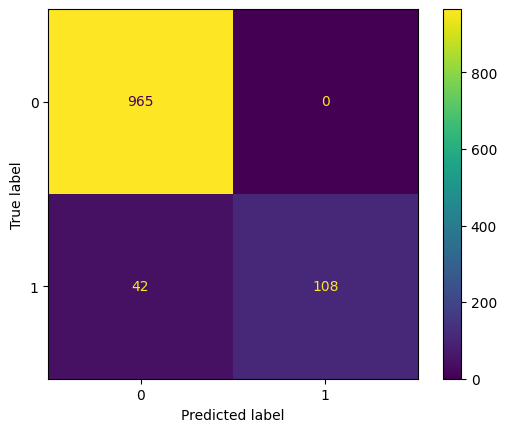

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# รับค่าที่ทำนายได้จาก Naive Bayes
y_pred = nb.predict(X_test_vec)

# สร้าง Confusion Matrix แล้วตรวจสอบความแม่นยำในการจำแนก (ham or spam)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

จากการแสดง Confusion Matrix พบว่าตัวจำแนก Naive Bayes สามารถทำนายการจำแนกกลุ่มได้แม่นยำมาก

True label เป็น 0 หรือ ham สามารถทำนายได้ถูกต้องและแม่นยำหมดทั้ง 965 ข้อความ

True label เป็น 1 หรือ spam มีการทำนายผิดเป็น ham อยู่ 42 ข้อความ แต่สามารถทำนายถูกได้ว่าเป็น spam อยู่ 108 ข้อความ

### 6. Submit your program to the assignment submission system (http://hw.cs.science.cmu.ac.th/).